<a href="https://colab.research.google.com/github/pradiptars/ML_Project_Deploy/blob/main/Ml_Deploy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
from google.colab import files
uploaded =files.upload()

Saving Student.csv to Student.csv


In [21]:
df = pd.read_csv('Student.csv')

In [22]:
df.head()

,time_study,Marks
0,4.508,19.202
1,0.096,7.734
2,3.133,13.811
3,7.909,53.018
4,7.811,55.299


In [23]:
df.shape

(100, 2)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time_study  100 non-null    float64
 1   Marks       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [25]:
df.describe()

,time_study,Marks
count,100.000000,100.000000
mean,4.077140,24.417690
std,2.372914,14.326199
min,0.096000,5.609000
25%,2.058500,12.633000
50%,4.022000,20.059500
75%,6.179250,36.676250
max,7.957000,55.299000


Text(0.5, 1.0, 'Scatter Plot')

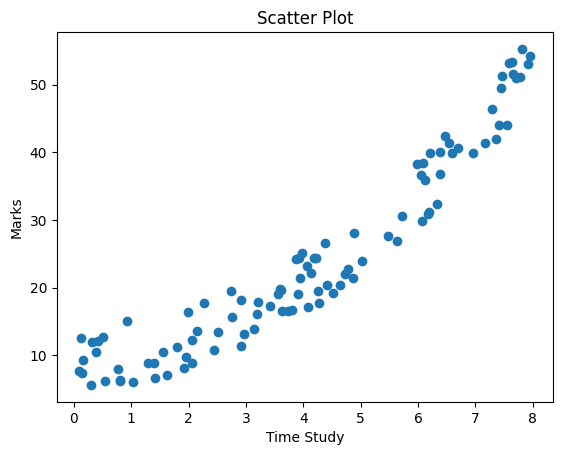

In [26]:
plt.scatter(x = df.time_study, y = df.Marks)
plt.xlabel('Time Study')
plt.ylabel('Marks')
plt.title('Scatter Plot')

In [27]:
df.isnull().sum()

,0
time_study,0
Marks,0


In [28]:
X = df.drop('Marks', axis="columns")
y = df['Marks']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

In [30]:
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (80, 1)
Shape of y_train =  (80,)
Shape of X_test =  (20, 1)
Shape of y_test =  (20,)


In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [32]:
lr.fit(X_train, y_train)

LinearRegression()

In [33]:
lr.coef_

array([5.49211084])

In [34]:
lr.intercept_

2.029110073144068

In [35]:
m = 5
c = 2
y = m * 4 + c

In [36]:
y


22

In [41]:
lr.predict([[4]])[0].round(2)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


24.0

In [42]:
y_pred = lr.predict(X_test)
y_pred

array([15.85824516, 10.58032664,  4.35227296, 19.58738841, 42.95082791,
       23.87123486, 45.72983599, 44.92798781,  6.4502593 ,  6.43927507,
       27.47405957, 12.76069465, 22.88265491, 24.99711759, 43.99432897,
       19.23589332, 28.27590775, 24.71152782, 26.78754572, 41.36909999])

In [43]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns=['Time Study', 'Marks', 'Predicted Marks'])

,Time Study,Marks,Predicted Marks
0,2.518,13.416,15.858245
1,1.557,10.429,10.580327
2,0.423,12.132,4.352273
3,3.197,16.106,19.587388
4,7.451,49.544,42.950828
5,3.977,25.133,23.871235
6,7.957,54.321,45.729836
7,7.811,55.299,44.927988
8,0.805,6.349,6.450259
9,0.803,6.217,6.439275


In [44]:
lr.score(X_test, y_test)

0.8826200571575015

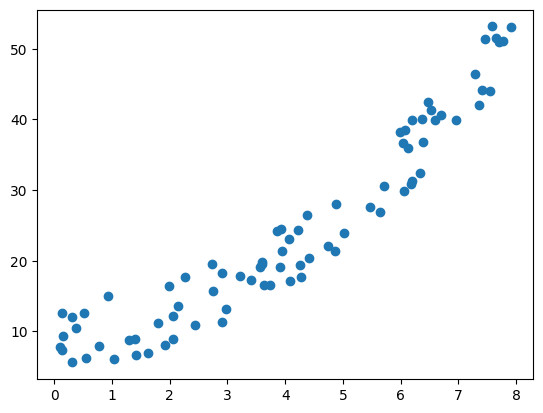

In [45]:
plt.scatter(X_train, y_train)


Text(0.5, 1.0, 'Scatter Plot')

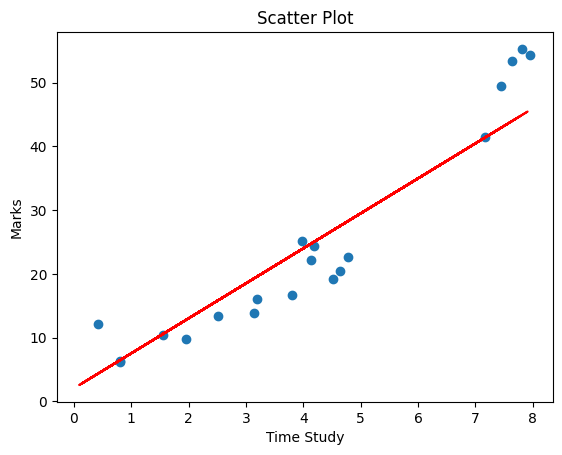

In [48]:
plt.scatter(X_test, y_test)
plt.plot(X_train, lr.predict(X_train), color = 'r')
plt.xlabel('Time Study')
plt.ylabel('Marks')
plt.title('Scatter Plot')

# Save ML model

In [50]:
import joblib
joblib.dump(lr, 'Student_Marks_Predictor.pkl')

['Student_Marks_Predictor.pkl']

In [51]:
model = joblib.load('Student_Marks_Predictor.pkl')

In [52]:
model.predict([[4]])[0].round(2)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


24.0